In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import cvxpy as cp
import pandas as pd
import time
import networkx
from statistics import mode

print("imported all packages")

(CVXPY) Feb 26 11:52:39 PM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/Nishant/anaconda3/lib/python3.9/site-packages/_scs_direct.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <C5D99CE8-1937-36B7-A660-713E029B0166> /Users/Nishant/anaconda3/lib/python3.9/site-packages/_scs_direct.cpython-39-darwin.so\n  Reason: tried: '/Users/Nishant/anaconda3/lib/python3.9/site-packages/../../liblapack.3.dylib' (no such file), '/Users/Nishant/anaconda3/lib/python3.9/site-packages/../../liblapack.3.dylib' (no such file), '/Users/Nishant/anaconda3/bin/../lib/liblapack.3.dylib' (no such file), '/Users/Nishant/anaconda3/bin/../lib/liblapack.3.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS@rpath/liblapack.3.dylib' (no such file), '/Users/Nishant/anaconda3/lib/python3.9/site-packages/../../liblapack.3.dylib' (no such file), '/Users/Nishant/anaconda3/lib/python3.9/site-packages/../../liblapack.3.dylib' (no su

In [2]:
airports100cont=pd.read_csv('airports100cont.csv')
demandMat=pd.read_csv('demandMat.csv',header=None)
mapOutline=pd.read_csv('mapOutline.csv',header=None)
addfareMat=pd.read_csv('addfareMat.csv',header=None)

x=airports100cont['Longitude']
y=airports100cont['Latitude']
mysize=airports100cont['Passengers']
mylabels=airports100cont['Airport']

In [5]:
airports100cont

,Unnamed: 0,Airport,Passengers,Name,Longitude,Latitude
0,0,LAX,1047177.0,Los Angeles International Airport,-118.407997,33.942501
1,1,MCO,967241.0,Orlando International Airport,-81.308998,28.429399
2,2,LAS,875216.0,McCarran International Airport,-115.152000,36.080101
3,3,DEN,858360.0,Denver International Airport,-104.672996,39.861698
4,4,ORD,781873.0,Chicago O'Hare International Airport,-87.904800,41.978600
...,...,...,...,...,...,...
95,95,MYR,34681.0,Myrtle Beach International Airport,-78.928299,33.679699
96,96,DAY,33267.0,James M Cox Dayton International Airport,-84.219398,39.902401
97,97,ICT,32262.0,Wichita Eisenhower National Airport,-97.433098,37.649899
98,98,COS,32018.0,City of Colorado Springs Municipal Airport,-104.700996,38.805801


Text(0, 0.5, 'Latitude')

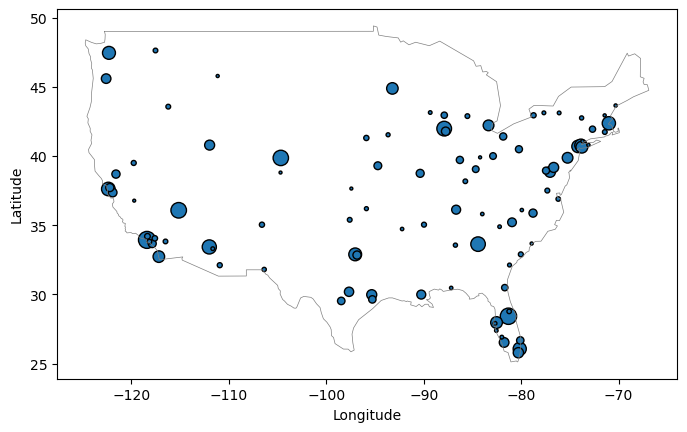

In [6]:
fig1, plot1 = plt.subplots()
plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='grey',linewidth=0.5)
plot1.scatter(x,y,s=mysize/7000,edgecolors='k')
fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')

#plt.savefig('onlypoints.pdf')

#for i, txt in enumerate(mylabels):
#    plot1.annotate(txt, (x[i], y[i]),fontsize=8)

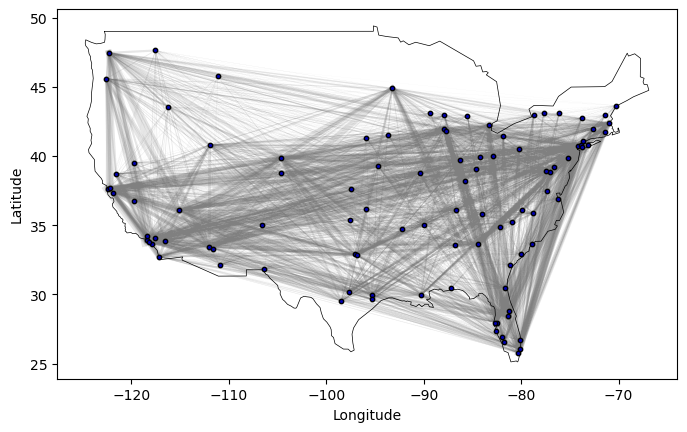

In [223]:
fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if demandMat.iloc[i,j]>=1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'grey',linewidth=(demandMat.iloc[i,j])/8000,alpha=0.1,zorder=1)

plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=10,color='#0000b0',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')

#plt.savefig('lineweights.pdf')

#for i, txt in enumerate(mylabels):
#    plot1.annotate(txt, (x[i], y[i]),fontsize=8)

99


Text(0, 0.5, 'Latitude')

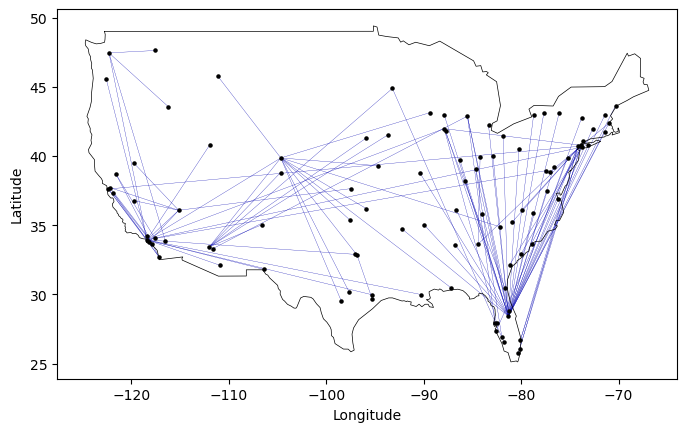

In [100]:
#plot minimum inverse demand spanning tree

#generate inverse demand matrix
inversedemand=80000-demandMat
np.fill_diagonal(inversedemand.to_numpy(), 0)

#generate minimum spanning tree
mygraph1=scipy.sparse.csgraph.minimum_spanning_tree(inversedemand).toarray()
mygraph1=1*(mygraph1>0)
#mygraph=mygraph+mygraph.T
print(sum(sum(mygraph1)))

fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph1[i,j]==1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)

plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')

#plt.savefig('demandtree.pdf')

(-1.1, 1.1, -1.1, 1.1)

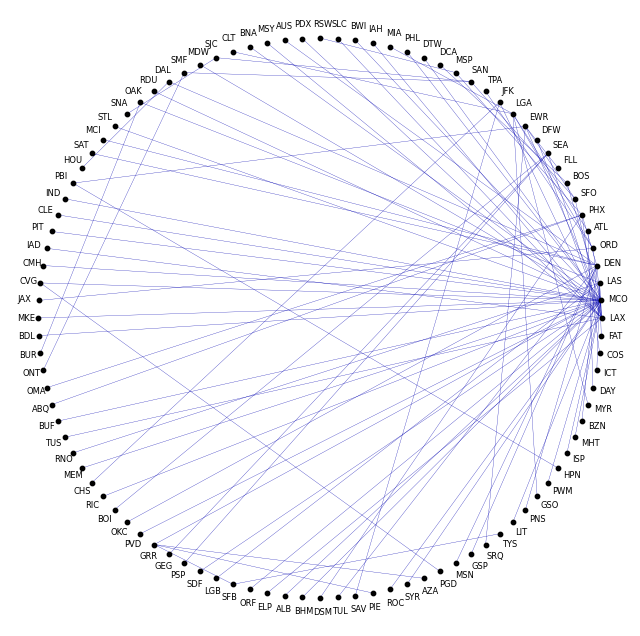

In [11]:
#plot minimum inverse demand spanning tree as a circle

radians=np.linspace(0, 2*math.pi, num=100, endpoint=False)
circlex=np.ones(100)
circley=np.ones(100)
for i in range(100):
    circlex[i]=math.cos(radians[i])
    circley[i]=math.sin(radians[i])


fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph1[i,j]==1:
            plt.plot((circlex[i], circlex[j]),(circley[i], circley[j]),'#0000b0',linewidth=0.2)

#plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(circlex,circley,s=10,color='k',edgecolors='k',zorder=3)

for i, txt in enumerate(mylabels):
    plot1.annotate(txt, (circlex[i], circley[i]),(circlex[i]*1.05-0.025, circley[i]*1.05-0.01),textcoords='data',fontsize=6)

fig1.set_size_inches(8,8)
plot1.axis('off')

#plt.savefig('demandtreecircle.pdf',bbox_inches='tight')

99


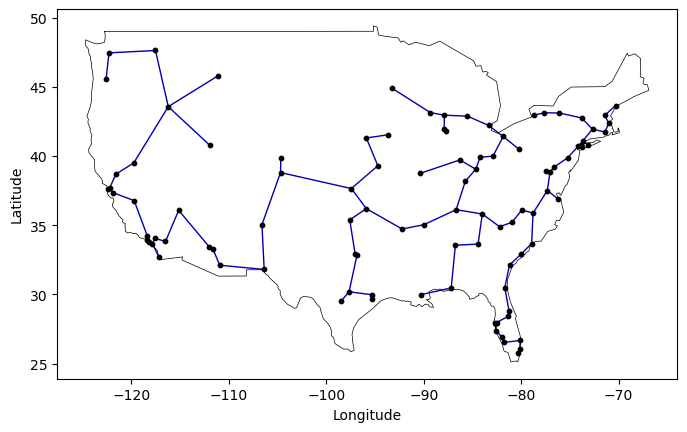

In [6]:
#plot minimum distance spanning tree

distanceMat=pd.read_csv('lengthMat.csv',header=None)
#generate minimum distance spanning tree
mygraph2=scipy.sparse.csgraph.minimum_spanning_tree(distanceMat).toarray()
mygraph2=1*(mygraph2>0)
#mygraph=mygraph+mygraph.T
print(sum(sum(mygraph2)))



fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph2[i,j]==1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=1)

plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=10,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')

#plt.savefig('distancetree.pdf')

<BarContainer object of 10 artists>

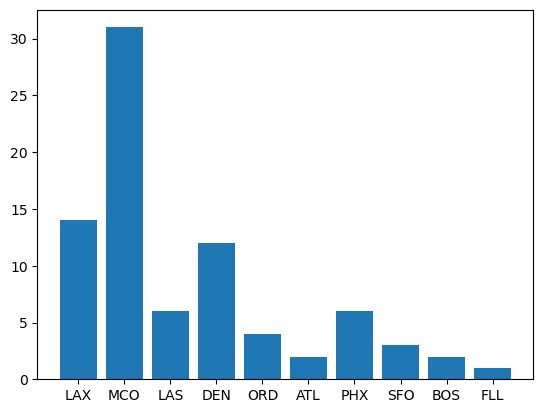

In [34]:
#expoloring winner take all behavior
#mygraph1=mygraph1+graph1.T
#plt.bar(airports100cont.iloc[0:10,1],sum(mygraph1)[0:10])

99
99
99
99


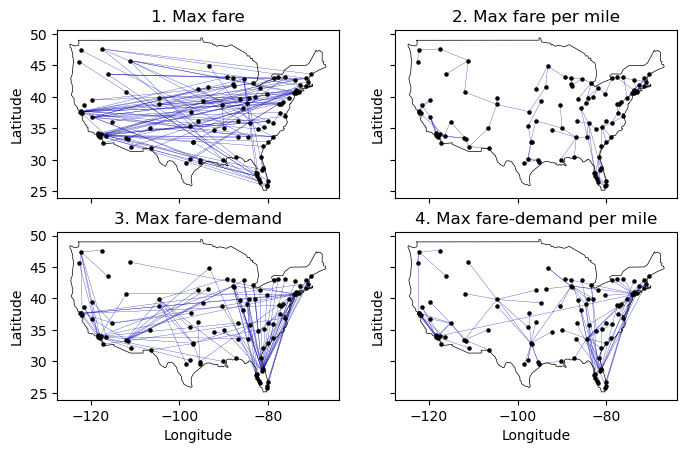

In [89]:
#fare-accounted max spanning trees!
fareMat=pd.read_csv('fareMat.csv',header=None)

fig1, ((plot1,plot2),(plot3,plot4))= plt.subplots(2,2, sharex=True, sharey=True)
fig1.set_size_inches(8,4.8)


#generation for normal fare
inversefare=1000-fareMat
np.fill_diagonal(inversefare.to_numpy(), 0)
mygraph3=scipy.sparse.csgraph.minimum_spanning_tree(inversefare).toarray()
mygraph3=1*(mygraph3>0)
print(sum(sum(mygraph3)))
# first plot
for i in range(100):
    for j in range(100):
        if mygraph3[i,j]==1:
            plot1.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)
plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)
#plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')
plot1.set_title("1. Max fare")

#generation for fare per mile
np.fill_diagonal(fareMat.to_numpy(), 1)
np.fill_diagonal(distanceMat.to_numpy(), 1)
farepermileMat=np.divide(fareMat.to_numpy(),distanceMat.to_numpy())
np.fill_diagonal(fareMat.to_numpy(), 0)
np.fill_diagonal(distanceMat.to_numpy(), 0)
np.fill_diagonal(farepermileMat, 0)
#
inversefpm=8-farepermileMat
np.fill_diagonal(inversefpm, 0)
mygraph4=scipy.sparse.csgraph.minimum_spanning_tree(inversefpm).toarray()
mygraph4=1*(mygraph4>0)
print(sum(sum(mygraph4)))
# second plot
for i in range(100):
    for j in range(100):
        if mygraph4[i,j]==1:
            plot2.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)
plot2.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot2.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)
#plot2.set_xlabel('Longitude')
plot2.set_ylabel('Latitude')
plot2.set_title("2. Max fare per mile")

#generation for fare-demand
faredemand=np.multiply(fareMat.to_numpy(),demandMat.to_numpy());
inversefaredemand=40000000-faredemand
np.fill_diagonal(inversefaredemand, 0)
mygraph5=scipy.sparse.csgraph.minimum_spanning_tree(inversefaredemand).toarray()
mygraph5=1*(mygraph5>0)
print(sum(sum(mygraph5)))
# first plot
for i in range(100):
    for j in range(100):
        if mygraph5[i,j]==1:
            plot3.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)
plot3.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot3.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)
plot3.set_xlabel('Longitude')
plot3.set_ylabel('Latitude')
plot3.set_title("3. Max fare-demand")

#generation for fare-demand-per-mile
np.fill_diagonal(distanceMat.to_numpy(), 1)
fdm=np.divide(faredemand,distanceMat.to_numpy())
np.fill_diagonal(distanceMat.to_numpy(), 0)
#
inversefdm=30000-fdm
np.fill_diagonal(inversefdm, 0)
mygraph6=scipy.sparse.csgraph.minimum_spanning_tree(inversefdm).toarray()
mygraph6=1*(mygraph6>0)
print(sum(sum(mygraph6)))
# first plot
for i in range(100):
    for j in range(100):
        if mygraph6[i,j]==1:
            plot4.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)
plot4.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot4.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)
plot4.set_xlabel('Longitude')
plot4.set_ylabel('Latitude')
plot4.set_title("4. Max fare-demand per mile")

plt.savefig('faretree.pdf')

99


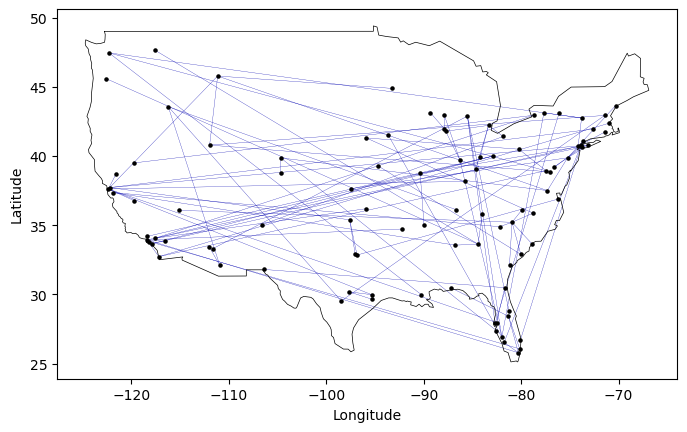

In [111]:
#plot for addfareMat

#generate inverse demand matrix
addfaredemand=np.multiply(addfareMat.to_numpy(),demandMat.to_numpy())
inverseaddfare=(500-addfareMat).to_numpy()
#inverseaddfare=13000000-addfaredemand
np.fill_diagonal(inverseaddfare, 0)

#generate minimum spanning tree
mygraph10=scipy.sparse.csgraph.minimum_spanning_tree(inverseaddfare).toarray()
mygraph10=1*(mygraph10>0)
print(sum(sum(mygraph1)))

fig1, plot1 = plt.subplots()

for i in range(100):
    for j in range(100):
        if mygraph10[i,j]==1:
            plt.plot((x[i], x[j]),(y[i], y[j]),'#0000b0',linewidth=0.2)

plot1.plot(mapOutline.iloc[0,:],mapOutline.iloc[1,:],color='black',linewidth=0.5,zorder=2)
plot1.scatter(x,y,s=5,color='k',edgecolors='k',zorder=3)

fig1.set_size_inches(8,4.8)
plot1.set_xlabel('Longitude')
plot1.set_ylabel('Latitude')

plt.savefig('addfaretree.pdf')